
##**Importing Libraries**


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import pandas.api.types as ptypes
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Collecting Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Customerdataset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**Data Preprocessing**

In [ ]:
df.shape

df.describe()

df.isnull().sum()

df.dtypes

df.drop(["CustomerID"], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## **Populate list of numerical and categorical variables**

In [ ]:
num_list = []
cat_list = []

for column in df:
    if ptypes.is_numeric_dtype(df[column]):
        num_list.append(column)
    elif ptypes.is_string_dtype(df[column]):
        cat_list.append(column)

print("numeric: ", num_list)
print("categorical: ", cat_list)

numeric:  ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical:  ['Gender']


##**Distribution**

<ipython-input-5-9036a9e90bf6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
<ipython-input-5-9036a9e90bf6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
<ipython-input-5-9036a9e90bf6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed

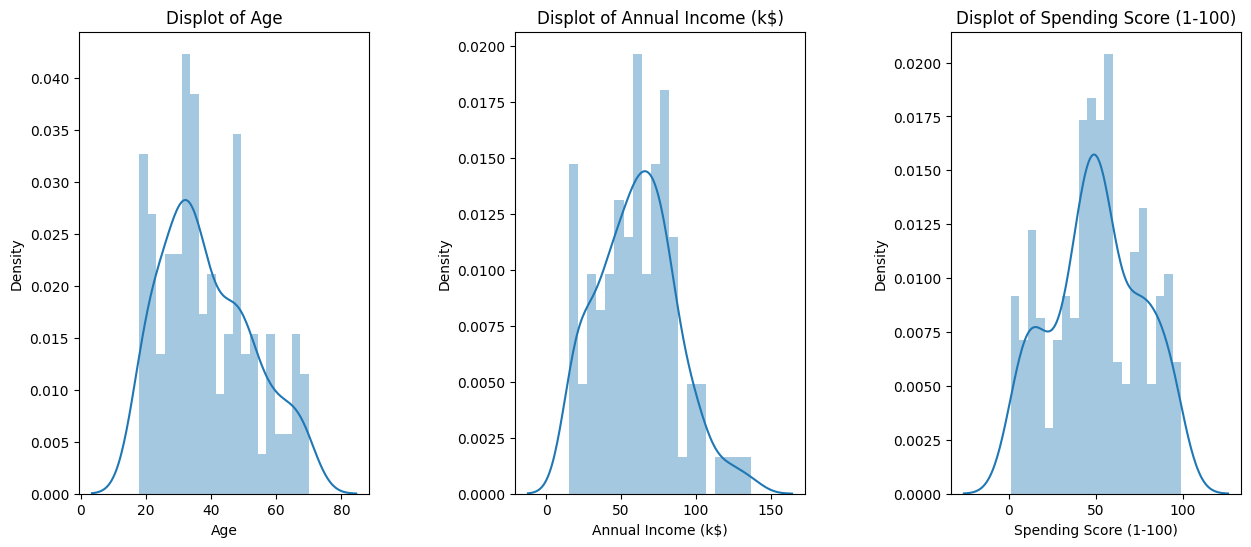

In [ ]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Displot of {}'.format(x))
plt.show()

##**Transforming data into standard scale**

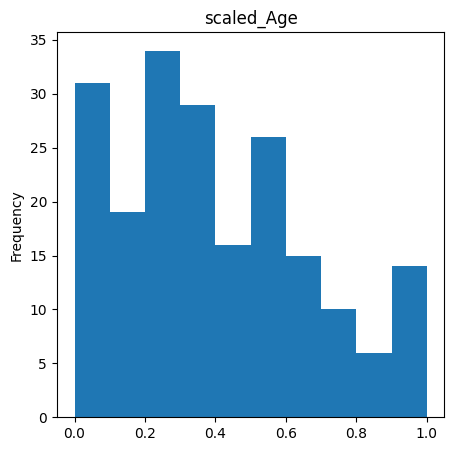

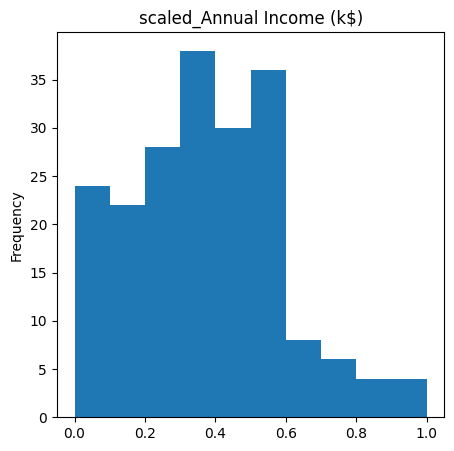

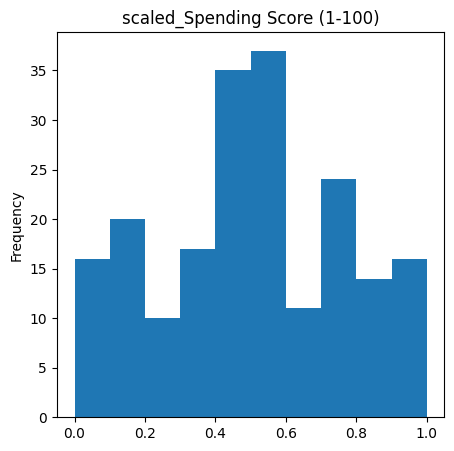

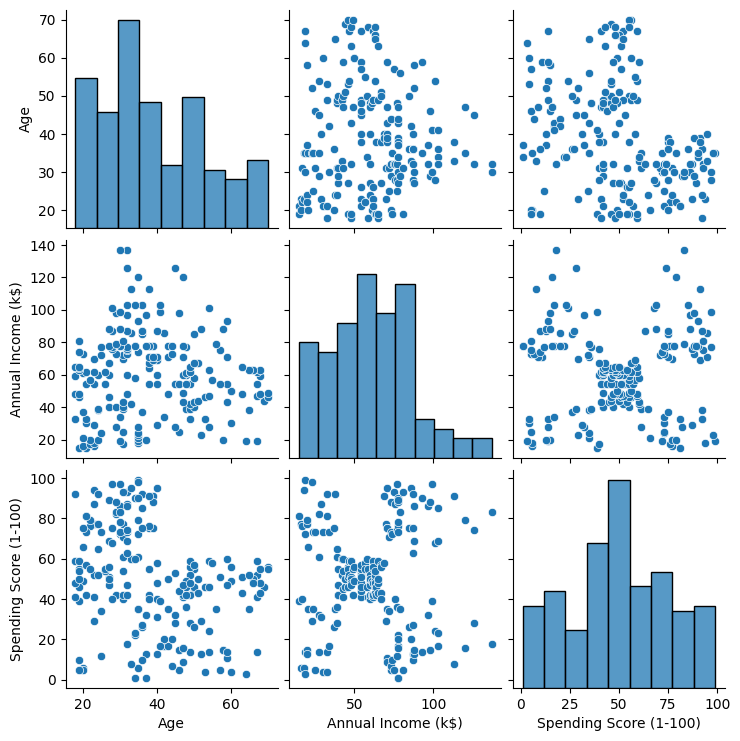

In [ ]:
scaler = MinMaxScaler()

for var in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    scaled_var = "scaled_" + var
    smodel = scaler.fit(df[var].values.reshape(-1, 1))
    df[scaled_var] = smodel.transform(df[var].values.reshape(-1, 1))

    plt.figure(figsize=(5, 5))
    print()
    plt.title(scaled_var)
    print()
    df[scaled_var].plot(kind='hist')
    print()
    plt.show()

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.pairplot(df[columns])

##**Spending Score and Annual Income**

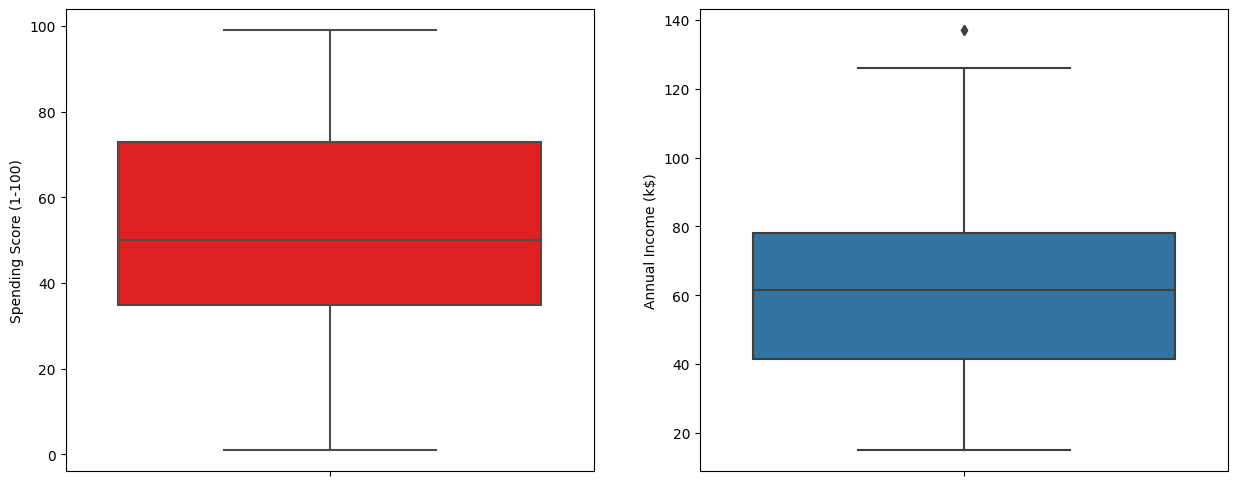

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

##**Distribution of Male and Female Populaton**

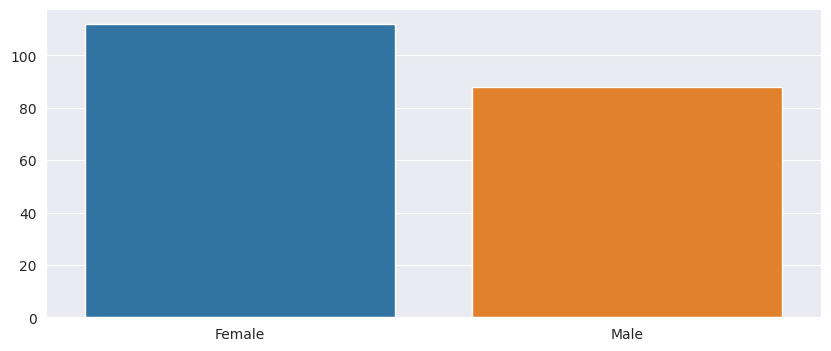

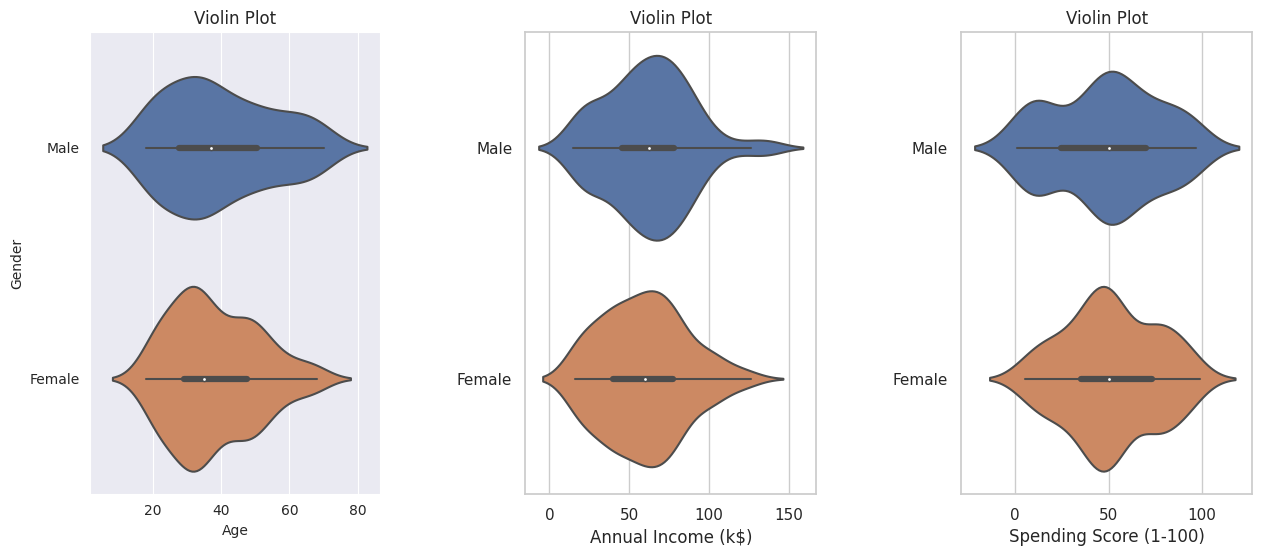

In [ ]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()
plt.figure(1, figsize=(15, 6))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()


##**Distribution of number of customers in each age group**

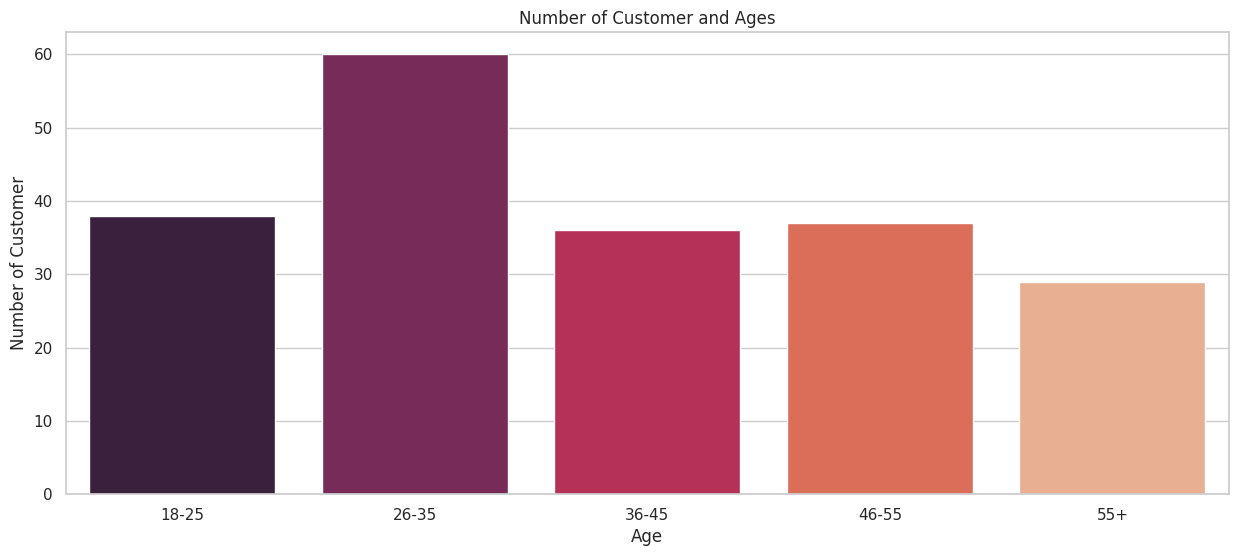

In [ ]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(
    age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

##**Number of customers according to their spending scores**

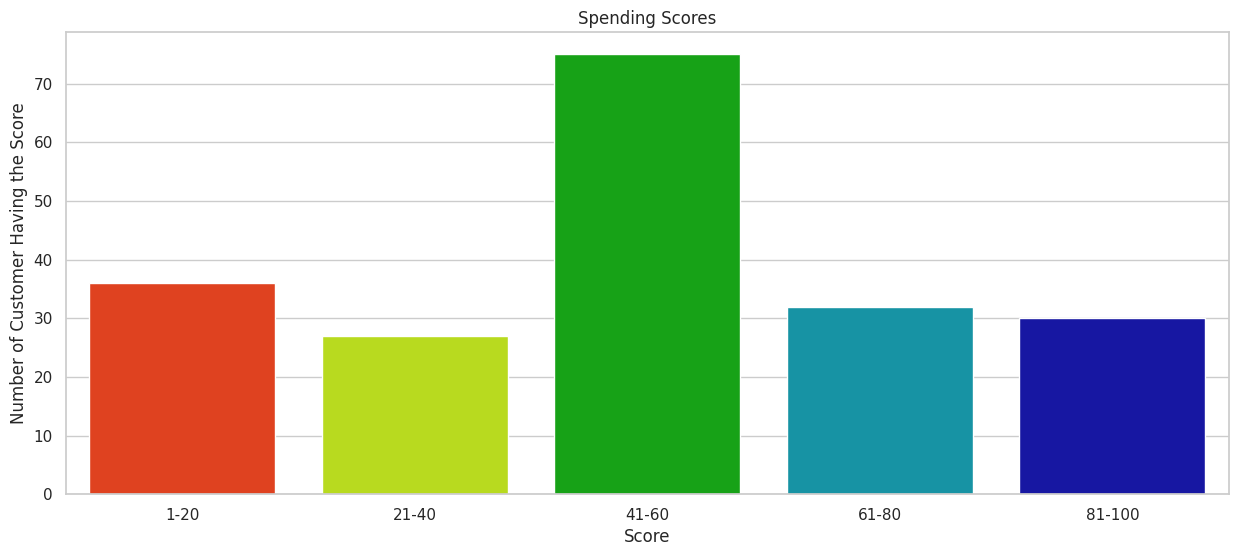

In [ ]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]
                                       >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]
                                        >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]
                                        >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]
                                        >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]
                                         >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(
    ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

##**Number of customers according to their annual income**

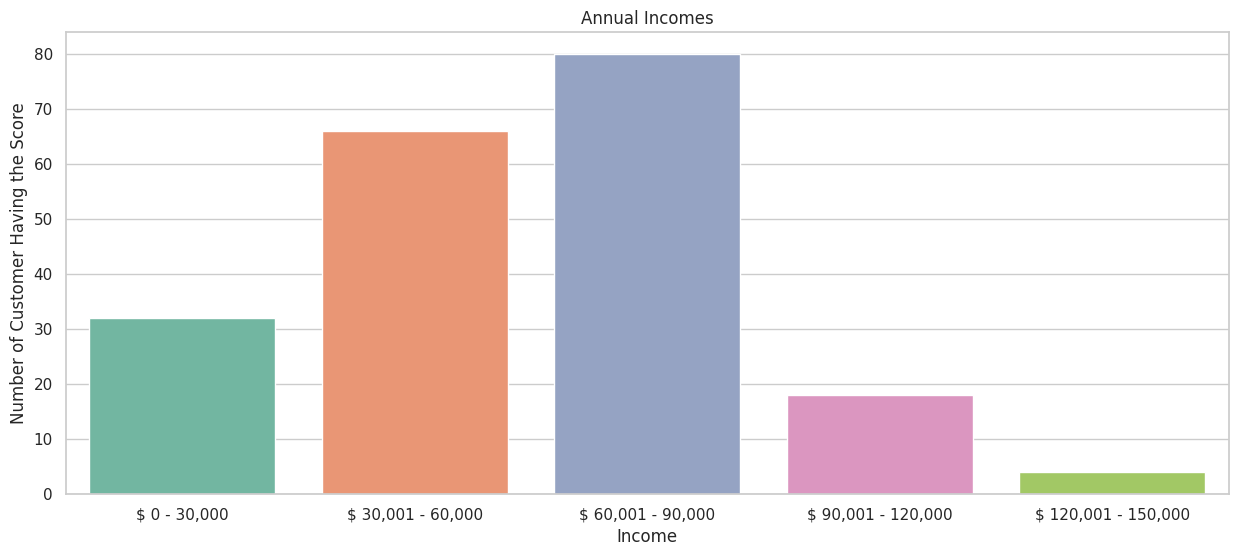

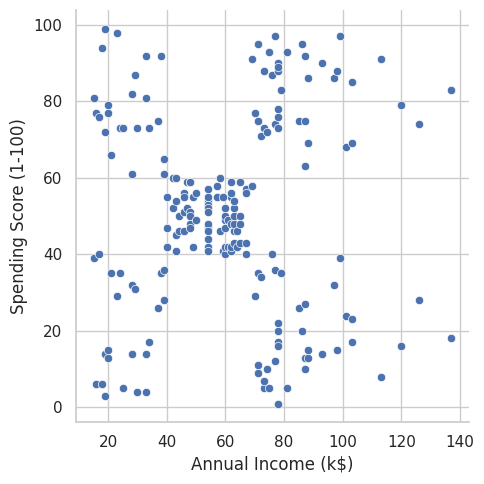

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (
    df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(
    df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(
    df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(
    df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(
    df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000",
       "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(
    ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer Having the Score")
plt.show()

sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

##**Clustering of Age, Annual Income and Spending Score**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

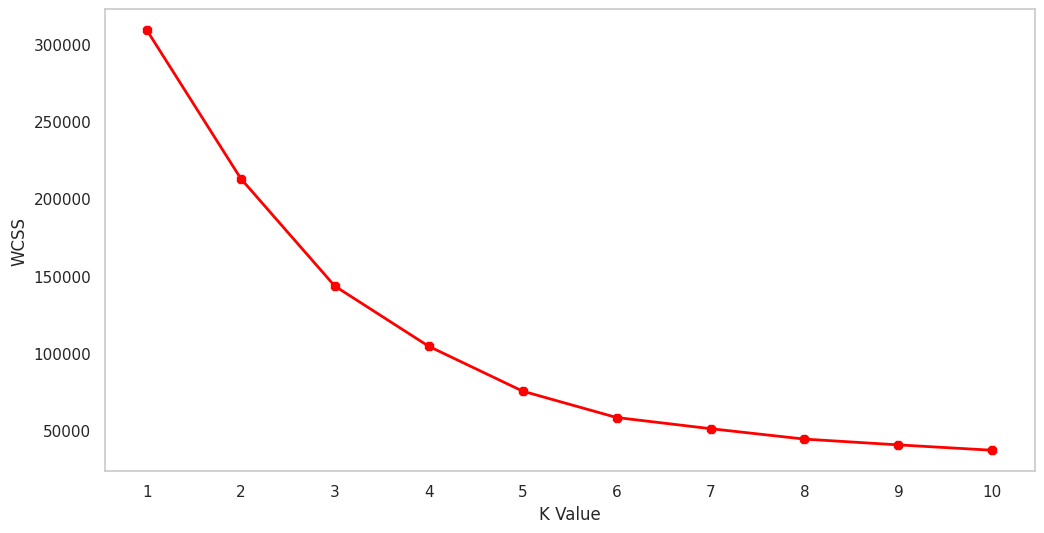

In [ ]:
X3 = df.iloc[:, 1:]

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

##**Fitting KMeans Clustering to the dataset and predict the Cluster label**

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(X3)
print(clusters)

print(kmeans.cluster_centers_)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
[[2.44482759e+01 5.63793103e+01 5.07241379e+01 1.24005305e-01
  3.39174675e-01 5.07389163e-01]
 [4.26363636e+01 1.08181818e+02 2.12727273e+01 4.73776224e-01
  7.63785395e-01 2.06864564e-01]
 [3.24545455e+01 1.08181818e+02 8.27272727e+01 2.77972028e-01
  7.63785395e-01 8.33951763e-01]
 [3.82307692e+01 3.03846154e+01 3.50769231e+01 3.89053254e-01
  1.26103405e-01 3.47723705e-01]
 [6.14444444e+01 5.11851852e+01 5.04444444e+01 8.35470085e-01
  2.96599879e-01 5.04535147e-01]
 [2.52727273e+01 2.57272727e+01 7.93636364e+01 1.39860140e-01
  8.79284650e-02 7.99628942e-01]
 [4.61600000e+01 6.1320

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##**Clustering Using KMeans Clustering**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


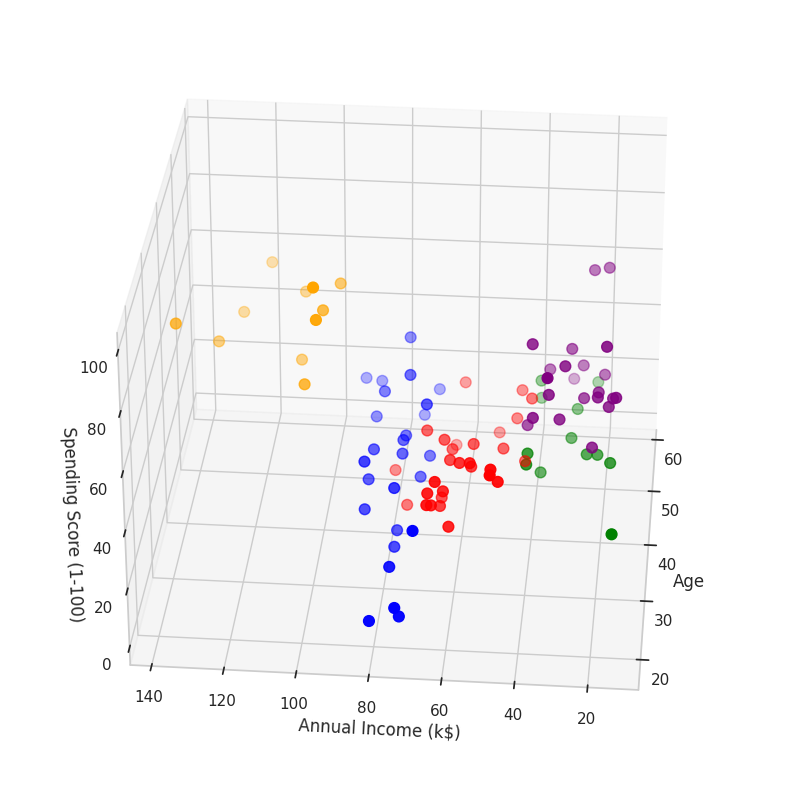

In [ ]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"][df.label == 0], df["Annual Income (k$)"][df.label ==
           0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df["Age"][df.label == 1], df["Annual Income (k$)"][df.label ==
           1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df["Age"][df.label == 2], df["Annual Income (k$)"][df.label == 2],
           df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df["Age"][df.label == 3], df["Annual Income (k$)"][df.label == 3],
           df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df["Age"][df.label == 4], df["Annual Income (k$)"][df.label == 4],
           df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## **Hierarchical** **Clustering** **Algorithm** **Loading** **Data**

In [ ]:
features = df.iloc[:, 2:5]
features.head()

,Annual Income (k$),Spending Score (1-100),scaled_Age
0,15,39,0.019231
1,15,81,0.057692
2,16,6,0.038462
3,16,77,0.096154
4,17,40,0.250000


##**Dendrogram**

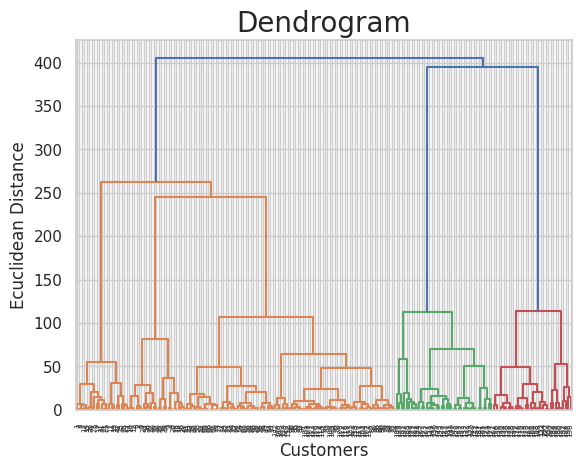

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(features, method='ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

##**Fitting Hierarchical Clustering to the dataset and predict the Cluster label**

In [ ]:
cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(features)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

##**Clustering Using Hierarchical Clustering**

Text(0, 0.5, 'Spending Score')

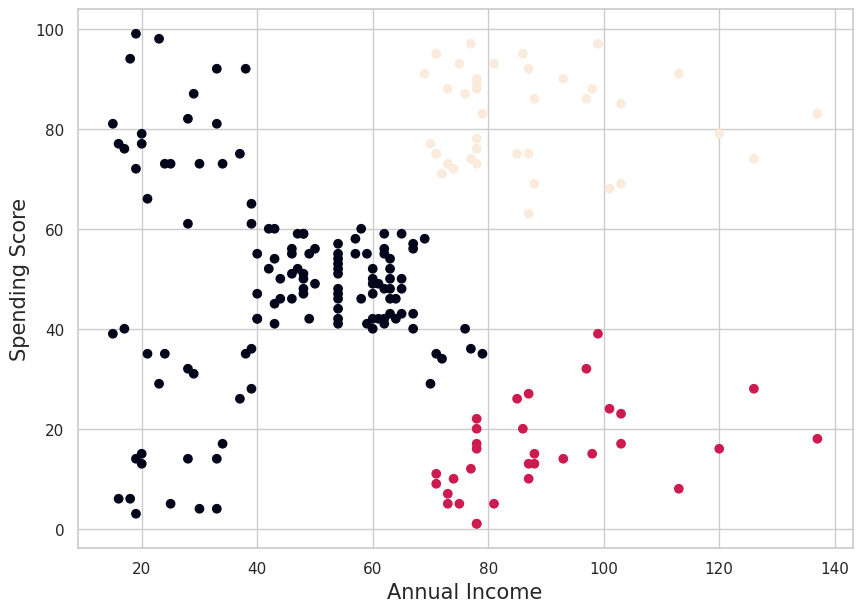

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(features['Annual Income (k$)'],
            features['Spending Score (1-100)'], c=cluster.labels_)
plt.xlabel("Annual Income", fontsize=15)
plt.ylabel("Spending Score", fontsize=15)

##**Fitting DBSCAN to the dataset and predict the Cluster label**

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=4)
labels = dbscan.fit_predict(df.iloc[:, 2:5])
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

##**Visualising the clusters**

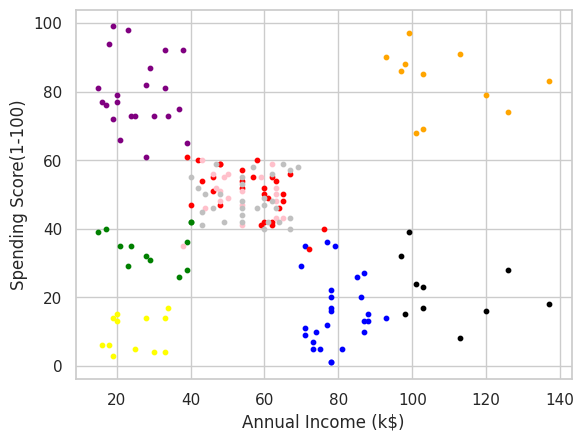

In [ ]:
plt.scatter(df["Annual Income (k$)"][df.label == 0],
            df["Spending Score (1-100)"][df.label == 0], c='blue', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 1],
            df["Spending Score (1-100)"][df.label == 1], c='red', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 2],
            df["Spending Score (1-100)"][df.label == 2], c='green', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 3],
            df["Spending Score (1-100)"][df.label == 3], c='orange', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 4],
            df["Spending Score (1-100)"][df.label == 4], c='purple', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 5],
            df["Spending Score (1-100)"][df.label == 5], c='pink', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 6],
            df["Spending Score (1-100)"][df.label == 6], c='yellow', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 7],
            df["Spending Score (1-100)"][df.label == 7], c='silver', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 8],
            df["Spending Score (1-100)"][df.label == 8], c='black', s=10)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()